Try quadratic in the total costs of the profit function.

In [6]:
# Cite:
# https://github.com/PharmCat/MvNormalCDF.jl

Revise: Check what would happen if we reduce the number of Consumers to 100 (same method in DVC_Clean_Julia01_experiment_v2.3).

Keep the parameters as 2 as before.

In [1]:
# import packages
using Distributions, Random, MvNormalCDF
using Query, Plots, StatsPlots
using DataFrames, CSV, Dates

Define the functions

In [100]:
# Example functions of deltap: from the investment to the value brought by the developers
## Linear

# function deltap_a(c_0_a) # original: 2
#     2 * c_0_a
# end

# function deltap_b(c_0_b)
#     2 * c_0_b
# end

## Quadratic

function deltap_a(c_0_a) # original: 2
    2 * c_0_a
end

function deltap_b(c_0_b)
    2 * c_0_b
end

deltap_b (generic function with 1 method)

In [101]:
# Example functionality of softwares

function theta_func(theta_1_bar_a, c_0_a)
    theta_1_bar_a + 2 * c_0_a
end    

theta_func (generic function with 1 method)

In [102]:
# Example utility function of customer

function util(u_bar_a, x_1, y_1, theta_1, c_0_a, p_s_a)
    u_bar_a + x_1 * theta_1 + y_1 * c_0_a - p_s_a
end

util (generic function with 1 method)

In [103]:
# Example total cost

function c_total_a(c_0_a, m, c_res_a)
#    c_0_a^4 + m * c_res_a
    c_0_a^3 + m * c_res_a    
end

c_total_a (generic function with 1 method)

In [104]:
# Example functions of profits of owners (firms a and b)

function profit_a(m, price_s_a, c_0_a, c_res_a)
#     m * price_s_a - c_0_a^4 - m * c_res_a
    m * price_s_a - c_0_a^3 - m * c_res_a
end

profit_a (generic function with 1 method)

Joint distribution of customers

In [8]:
# By now we assume that both follow normal distributions
# x ~ N(0.8, 0.05) # tbd: evidence?
# y ~ N(0, 0.05)
# Joint dist.: correlation = 0 # tbd: evidence?
# Draw the bivariate joint dist.
mu = [0.8; 0];
sigma = [0.05^2 0; 0 0.2^2];
dist01 = MvNormal(mu, sigma);

In [9]:
# Bivariate Normal dist.
a = [0; -1]
b = [1; 1]
# m: number of integration points (default 1000*dimension)
(p,e) = mvnormcdf(mu, sigma, a, b; m = 2000) # Multivariate Normal probability integral

(0.9999677554731808, 0.0)

In [10]:
# Sampling
Random.seed!(123);
rand_sample01 = rand(dist01,100)';
# rand_sample01 = rand(dist01,1000)'; # 1000; 100;

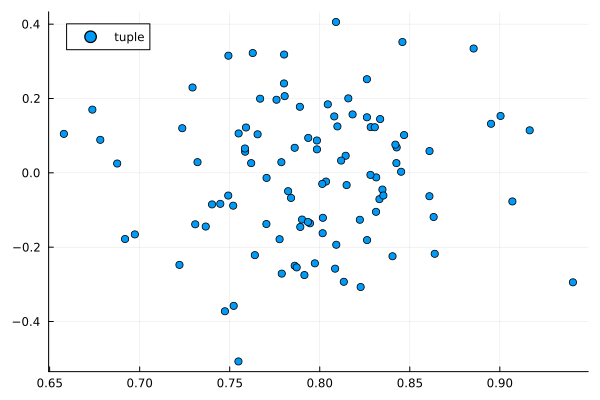

In [11]:
x = rand_sample01[:,1]
y = rand_sample01[:,2]
plot(x, y, seriestype=:scatter, label="tuple")

In [12]:
# Check range: should be restricted to the range [0,1] and [-1,1]
[minimum(x), maximum(x), minimum(y), maximum(y)]

4-element Vector{Float64}:
  0.6579027424502671
  0.940596384807489
 -0.5073372309626357
  0.4057822970905063

In [13]:
# Save the sample values
rand_sample01

100×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.840414  -0.224415
 0.744768  -0.0833985
 0.814379   0.0459637
 0.778912  -0.271118
 0.803473  -0.0234646
 0.860964   0.0585829
 0.798443   0.0631666
 0.691881  -0.178015
 0.842712   0.0683564
 0.784056  -0.0674909
 0.900406   0.153006
 0.809013   0.405782
 0.793618   0.0938954
 ⋮         
 0.793428  -0.132125
 0.732116   0.0287385
 0.747336  -0.372387
 0.749183  -0.0611277
 0.835332  -0.0609882
 0.758454   0.0655173
 0.811887   0.0330049
 0.940596  -0.294526
 0.801731  -0.120972
 0.787192  -0.254397
 0.754843  -0.507337
 0.79728   -0.243465

In [14]:
df_rand_sample01 = DataFrame(s = x, st_R = y)

Row,s,st_R
,Float64,Float64
1,0.840414,-0.224415
2,0.744768,-0.0833985
3,0.814379,0.0459637
4,0.778912,-0.271118
5,0.803473,-0.0234646
6,0.860964,0.0585829
7,0.798443,0.0631666
8,0.691881,-0.178015
9,0.842712,0.0683564


In [15]:
# CSV.write("C:\\Users\\zwang3\\Downloads\\rand_sample01_n_1000.csv", df_rand_sample01)

Check the scenarios - Insert the sample

In [10]:
# locatn = "C:/Users/zwang3/Downloads/DVC Experiments01";

In [124]:
# CSV.read("C:\\Users\\zwang3\\Downloads\\rand_sample01_n_1000.csv", DataFrame) #; delim=","
# rand_sample02_new_100 = CSV.read("C:\\Users\\think\\Downloads\\rand_sample02_new_100.csv", DataFrame) #; delim=","
# rand_sample02_new_100 = CSV.read("C:/Users/zwang3/Downloads/DVC Experiments01/rand_sample01_n_100.csv", DataFrame) #; delim=","
# rand_sample02_new_100 = CSV.read("C:/Users/zwang3/Downloads/DVC Experiments01/rand_sample02_new_100.csv", DataFrame) #; delim=","
rand_sample02_new_100 = CSV.read("C:/Users/zwang3/Downloads/DVC Experiments01/rand_sample03_new_100.csv", DataFrame) #; delim=","

Row,s,st_R
,Float64,Float64
1,0.503097,0.527841
2,0.470209,0.504666
3,0.55429,0.342344
4,0.508797,0.586538
5,0.360486,0.310798
6,0.510894,0.434405
7,0.513376,0.500739
8,0.553036,0.347573
9,0.460853,0.446299


In [125]:
x = rand_sample02_new_100.s;
y = rand_sample02_new_100.st_R;

In [147]:
# One certain setup

# policy factor: data restriction
c_res_a = 10; c_res_b = 10

# cost of contract
c_0_a = 0; c_0_b = 0

# fundamental 
theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8

# functionality
theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a)
theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b)

# utility constant
u_bar_a = 100; u_bar_b = 100;

# number of customers
n_customers = 100;

# check Consumers' tastes
s = x; 
st_R = y;

# reserved utility
ru = 50; # homogenous

# prices
price_s_a = 11; price_s_b = 11; 

# Under the equilibrium prices

Random.seed!(123);

# Trial: Utility
utili_a = []
utili_b = []
for i in range(1, n_customers)
    append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
    append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
end

# buy randomly from one company if the utilities are the same
dist_bin = Binomial(1, 0.5); # (n,p)
bin = rand(dist_bin, n_customers)';

# count the numbers of purchase: buy - from a; buy2 - from b;
buy = []; buy2 = []; welf = [];
welf_a = []; welf_b = []; 

for j in range(1, n_customers)
    if ru <= max(utili_a[j], utili_b[j])
        if utili_a[j] > utili_b[j]
            append!(buy, 1);
            append!(welf, utili_a[j]);
            append!(welf_a, utili_a[j]); 
        elseif utili_a[j] < utili_b[j]
            append!(buy2, 1);
            append!(welf, utili_b[j]);
            append!(welf_b, utili_b[j]);
        else
            append!(buy, bin[j]);
            append!(buy2, 1-bin[j]);
            append!(welf, utili_a[j]);
            if buy[length(buy)] > 0
                append!(welf_a, utili_a[j]);
            else
                append!(welf_b, utili_b[j]);
            end
        end
    end
end

# Count the purchases
append!(buy, 0) # get rid of Any([])
append!(buy2, 0)

m1 = sum(buy);
m2 = sum(buy2);

# Objective functions regarding the global welfare
agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
agg_welfare = sum(welf) - agg_total_cost

pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a);
pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b);
total_pr = pr1 + pr2; 
    
# Gov. also consider the profit
append!(welf_a, 0); append!(welf_b, 0) 
agg_welfare_a = sum(welf_a) + pr1
agg_welfare_b = sum(welf_b) + pr2

# c_0_a, c_0_b, m1, m2, pr1, pr2, total_pr, agg_welfare
trial_new = [c_0_a c_0_b price_s_a price_s_b m1 m2 pr1 pr2 total_pr agg_welfare]
# trial_new = vcat(trial_new, trial)

1×10 Matrix{Float64}:
 0.0  0.0  11.0  11.0  45.0  55.0  45.0  55.0  100.0  8429.43

In [148]:
# Welfare related to each Owner
[agg_welfare_a agg_welfare_b]

1×2 Matrix{Float64}:
 4287.94  5241.49

In [41]:
# above checked

Visualization of the equilibrium point.

In [17]:
n_customers

100

Here we assume that the maximum investment an Owner can choose is 200.

In [25]:
# initial settings
# policy factor: data restriction
c_res_a = 0; c_res_b = 0;

# cost of contract # adjust this
c_0_a = 0; c_0_b = 0; # 0, 50, 100, 150, 200, 250, 300

# fundamental 
theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8

# functionality
theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a);
theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b);

# about 50 rounds for high and low rounds altogether, 50 rounds for asymmetric
# in total about 100 rounds, about 1400 min., 23h
# reduce: only low restriction, 75 rounds

In [26]:
# Simpler method: Reducing the size of the other set 
## from now on we suggest the the maximum investment of a firm is 100
## thanks for Nurten's suggestion

timest1 = now() # estimate the run time

Random.seed!(123);

pricelist1 = []
maxpricelist1 = [] # track the best response of b

search_range = 200;

for jj in 1:search_range # 100, 200

    price_s_a = jj # Under certain price jj, check the best response of b
    pricelist1 = []
    
    for ii in 1:search_range

        price_s_b = ii

        # Trial: Utility
        utili_a = []
        utili_b = []
        for i in 1:n_customers
            append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
            append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
        end

        # buy randomly from one company if the utilities are the same
        dist_bin = Binomial(1, 0.5); # (n,p)
        bin = rand(dist_bin, n_customers)';

        # count the numbers of purchase: buy - from a; buy2 - from b;
        buy = []; buy2 = [];

        for j in 1:n_customers
            if ru <= max(utili_a[j], utili_b[j])
                if utili_a[j] > utili_b[j]
                    append!(buy, 1);
                elseif utili_a[j] < utili_b[j]
                    append!(buy2, 1);
                else
                    append!(buy, bin[j]);
                    append!(buy2, 1-bin[j]);
                end
            else
            end
        end

        # Count the purchases
        append!(buy, 0) # get rid of Any([])
        append!(buy2, 0)

        m1 = sum(buy)
        m2 = sum(buy2)
        pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
        pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

        append!(pricelist1, pr2)

    end

    # Find which price could bring the maximum profit
    indx = minimum(findall(x -> x == maximum(pricelist1), pricelist1))
    append!(maxpricelist1, range(1, search_range)[indx]) # 100, 200
    
end

# Find the certain list

# maxpricelist1 # set of the BR of b under different prices of a
search_range2 = union(maxpricelist1) # the possible BR of b, duplicates in the list dropped

Random.seed!(123);

pricelist2 = []
maxpricelist2 = [] # track the best response of b

for jj in search_range2

    price_s_b = jj # Under certain price jj, check the best response of b
    pricelist2 = []
    
    for ii in 1:search_range

        price_s_a = ii

        # Trial: Utility
        utili_a = []
        utili_b = []
        for i in 1:n_customers
            append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
            append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
        end

        # buy randomly from one company if the utilities are the same
        dist_bin = Binomial(1, 0.5); # (n,p)
        bin = rand(dist_bin, n_customers)';

        # count the numbers of purchase: buy - from a; buy2 - from b;
        buy = []; buy2 = [];

        for j in 1:n_customers
            if ru <= max(utili_a[j], utili_b[j])
                if utili_a[j] > utili_b[j]
                    append!(buy, 1);
                elseif utili_a[j] < utili_b[j]
                    append!(buy2, 1);
                else
                    append!(buy, bin[j]);
                    append!(buy2, 1-bin[j]);
                end
            else
            end
        end

        # Count the purchases
        append!(buy, 0) # get rid of Any([])
        append!(buy2, 0)

        m1 = sum(buy)
        m2 = sum(buy2)
        pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
        pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

        append!(pricelist2, pr1)

    end

    # Find which price could bring the maximum profit
    indx = minimum(findall(x -> x == maximum(pricelist2), pricelist2))
    append!(maxpricelist2, range(1, search_range)[indx])
    
end

# Find the possible solutions 
# maxpricelist2 # set of the BR of a under different prices of b

tuple_b = tuple.(range(1, search_range, step = 1), maxpricelist1);
tuple_a = tuple.(maxpricelist2, search_range2);

# Find the same element of the vector: get the equilibrium prices (p_a*, p_b*)
set00 = intersect(Set(tuple_a),Set(tuple_b));

# Check the results under the equilibrium
# for just in range(1,100):
price_s_a = getfield.(set00, 1)[1]; price_s_b = getfield.(set00, 2)[1]; # derived from last step

In [27]:
timest2 = now() # estimate the run time: 100 Consumers, not even one minute!
timest2 - timest1 # next: 70, 100

22094 milliseconds

In [28]:
# trial

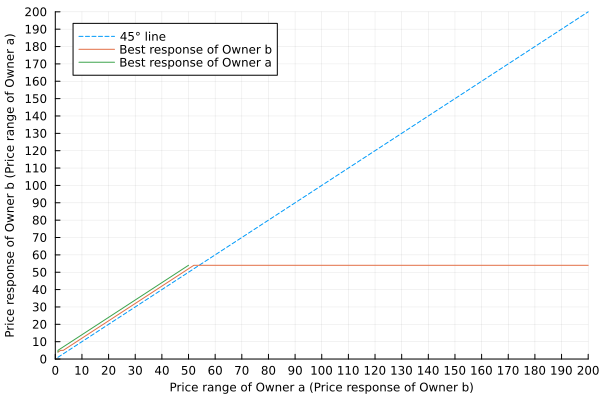

In [63]:
plot(1:200, 1:200, label = "45° line", ls=:dash) # , aspect_ratio = 1
xlabel!("Price range of Owner a (Price response of Owner b)")
ylabel!("Price response of Owner b (Price range of Owner a)")
plot!(xlabelfontsize=8, ylabelfontsize=8)
plot!(range(1, search_range, step = 1), maxpricelist1, label = "Best response of Owner b", lw=1)
plot!(maxpricelist2, search_range2, label = "Best response of Owner a", lw=1)
xlims!(0, 200)
ylims!(0, 200)
xticks!(0:10:200)
yticks!(0:10:200)

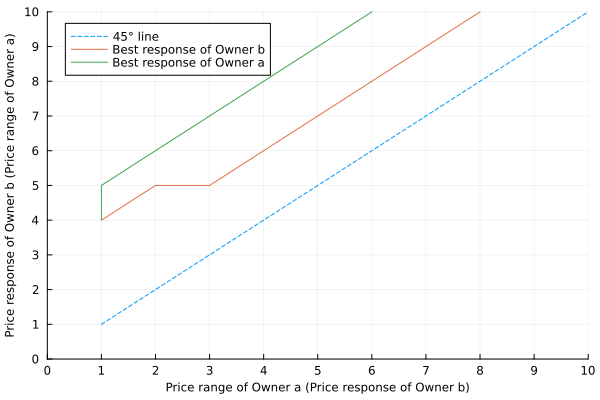

In [64]:
# Draw the range
x_start = 0
y_start = 0
plot(x_start + 1 : x_start + 10, 
    y_start + 1 : y_start + 10, 
    label = "45° line", ls=:dash) # , aspect_ratio = 1
xlabel!("Price range of Owner a (Price response of Owner b)")
ylabel!("Price response of Owner b (Price range of Owner a)")
plot!(xlabelfontsize=8, ylabelfontsize=8)
plot!(range(1, search_range, step = 1), maxpricelist1, label = "Best response of Owner b", lw=1)
plot!(maxpricelist2, search_range2, label = "Best response of Owner a", lw=1)
xlims!(x_start + 0, x_start + 10)
ylims!(y_start + 0, y_start + 10)
xticks!(x_start + 0:1:x_start + 10)
yticks!(y_start + 0:1:y_start + 10)

In [29]:
price_s_a, price_s_b

(1, 1)

In [30]:
# price_s_a = 6; price_s_b = 6; n_customers = 10000;
# price_s_a = 11; price_s_b = 15;
# price_s_a = 12.5; price_s_b = 41.5;
# price_s_a = 13.5; price_s_b = 56.5;
# price_s_a = 14.5; price_s_b = 71.5;
# price_s_a = 15.5; price_s_b = 87.5;
# price_s_a = 16.5; price_s_b = 102.5;
# price_s_a, price_s_b
c_0_a, c_0_b

(0, 0)

In [31]:
# Under the equilibrium prices
# c_res_a = 5; c_res_b = 5;
# #!!!!!!
# c_0_a = 6060; c_0_b = 60;
# theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8
# theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a)
# theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b)
# price_s_a = 1; price_s_b = 1;

Random.seed!(123);

# Trial: Utility
utili_a = []
utili_b = []
for i in range(1, n_customers)
    append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
    append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
end

# buy randomly from one company if the utilities are the same
dist_bin = Binomial(1, 0.5); # (n,p)
bin = rand(dist_bin, n_customers)';

# count the numbers of purchase: buy - from a; buy2 - from b;
buy = []; buy2 = []; welf = [];

for j in range(1, n_customers)
    if ru <= max(utili_a[j], utili_b[j])
        if utili_a[j] > utili_b[j]
            append!(buy, 1);
            append!(welf, utili_a[j]);
        elseif utili_a[j] < utili_b[j]
            append!(buy2, 1);
            append!(welf, utili_b[j]);
        else
            append!(buy, bin[j]);
            append!(buy2, 1-bin[j]);
            append!(welf, utili_a[j]);
        end
    else
    end
end

# Count the purchases
append!(buy, 0) # get rid of Any([])
append!(buy2, 0)

m1 = sum(buy);
m2 = sum(buy2);

# Objective functions regarding the global welfare
agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
agg_welfare = sum(welf) - agg_total_cost

pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a);
pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b);
total_pr = pr1 + pr2; 

# c_0_a, c_0_b, m1, m2, pr1, pr2, total_pr, agg_welfare
trial_new = [c_0_a c_0_b price_s_a price_s_b m1 m2 pr1 pr2 total_pr agg_welfare]
# trial_new = vcat(trial_new, trial)

1×10 Matrix{Float64}:
 0.0  0.0  1.0  1.0  45.0  55.0  45.0  55.0  100.0  9940.29

In [32]:
# [m1 m2 pr1 pr2 total_pr agg_welfare]
trial_new

1×10 Matrix{Float64}:
 0.0  0.0  1.0  1.0  45.0  55.0  45.0  55.0  100.0  9940.29

In [68]:
n_customers

100

In [241]:
# trial = trial_new
trial = vcat(trial, trial_new)

29×10 Matrix{Float64}:
  0.0   0.0  10.0   10.0  45.0  55.0  …        0.0        0.0   8054.84
  0.0  10.0  11.0   25.0   6.0  94.0         410.0      416.0   8127.38
  0.0  20.0  12.5   41.5   8.0  92.0       -5102.0    -5082.0   8056.09
  0.0  30.0  13.5   56.5   6.0  94.0      -22629.0   -22608.0   8128.45
  0.0  40.0  14.5   71.5   6.0  94.0      -58219.0   -58192.0   8200.99
  0.0  50.0  15.5   87.5   6.0  94.0  …  -117715.0  -117682.0   8179.53
  0.0  60.0  16.5  102.5   6.0  94.0     -207305.0  -207266.0   8252.06
 10.0  10.0  10.0   10.0  45.0  55.0       -1000.0    -2000.0   9605.11
 10.0  20.0  11.0   25.0   6.0  94.0       -6590.0    -7584.0   9677.65
 10.0  30.0  12.5   41.5   8.0  92.0      -24102.0   -25082.0   9606.35
 10.0  40.0  13.5   56.5   6.0  94.0  …   -59629.0   -60608.0   9678.72
 10.0  50.0  14.5   71.5   6.0  94.0     -119219.0  -120192.0   9751.26
 10.0  60.0  15.5   87.5   6.0  94.0     -208715.0  -209682.0   9729.79
  ⋮                              ⋮    ⋱  

In [242]:
trial_values = trial
df_equil_new001 = DataFrame(c_0_a = trial_values[:, 1], c_0_b = trial_values[:, 2],
    price_s_a = trial_values[:, 3], price_s_b = trial_values[:, 4],
    m1 = trial_values[:, 5], m2 = trial_values[:, 6],
    pr1 = trial_values[:, 7], pr2 = trial_values[:, 8],
    total_pr = trial_values[:, 9], agg_welfare = trial_values[:, 10])

Row,c_0_a,c_0_b,price_s_a,price_s_b,m1,m2,pr1,pr2,total_pr,agg_welfare
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,10.0,10.0,45.0,55.0,0.0,0.0,0.0,8054.84
2,0.0,10.0,11.0,25.0,6.0,94.0,6.0,410.0,416.0,8127.38
3,0.0,20.0,12.5,41.5,8.0,92.0,20.0,-5102.0,-5082.0,8056.09
4,0.0,30.0,13.5,56.5,6.0,94.0,21.0,-22629.0,-22608.0,8128.45
5,0.0,40.0,14.5,71.5,6.0,94.0,27.0,-58219.0,-58192.0,8200.99
6,0.0,50.0,15.5,87.5,6.0,94.0,33.0,-117715.0,-117682.0,8179.53
7,0.0,60.0,16.5,102.5,6.0,94.0,39.0,-207305.0,-207266.0,8252.06
8,10.0,10.0,10.0,10.0,45.0,55.0,-1000.0,-1000.0,-2000.0,9605.11
9,10.0,20.0,11.0,25.0,6.0,94.0,-994.0,-6590.0,-7584.0,9677.65


In [243]:
CSV.write("C:\\Users\\zwang3\\Downloads\\df_equil_new002_0701_res_10_10.csv", df_equil_new001) # tbd: save!

"C:\\Users\\zwang3\\Downloads\\df_equil_new002_0701_res_10_10.csv"